# AdaBoost
AdaBoost (short for Adaptive Boosting) is a powerful boosting algorithm that can boost the performance of any machine learning model. 

In AdaBoost, samples that are misclassified by one model are assigned greater weight when used to train the next model. Each model is thereby forced to concentrate on examples that were misclassified by the previous ones. The predictions of the models are then combined using a weighted majority vote, where the weights are based on how well each model performed on the training set.

The base learners used in boosting are usually **weak learners,** i.e., models whose accuracy is only slightly better than a random guesser $(50\% + \epsilon$ for a small $\epsilon$. The advantage of weak learners is that they are fast to train and they suffer less from overfitting. A weak learner that is often used is a **decision stump.** A decision stump is a decision tree with only one level, i.e., a tree with only one split:

<div style="align="center>
    <img src="media/decision_stump.png" width="400">
</div>

## The AdaBoost Algorithm
The algorithm takes as input a training set ${(x_1, y_1), \cdots, (x_n, y_n)}$, where each $x_i$ belongs to some input space $X$ (typically $x_i$ is a vector), and $y_i$ is a binary label that takes the values 1 or -1.

The algorithm itself consists of $T$ boosting rounds. In each round $t (t=1, \cdots, t=T)$, we train a weak classifier using a weak or a base learning algorithm (e.g., a decision stump learner).

In addition, the algorithm maintains a distribution or set of weights over the training set, denoted by $D$. The weight of this distribution on training sample $i$ in round $t$ is denoted by $D_t(i)$. Initially, the weights of all the samples are equal, i.e., in round 1 we have:

$$D_1(i) = \frac{1}{n}, i=1, \cdots, n$$

In each successive round, the weights of misclassified samples are increased so that the weak learner is forced to focus on the hard samples in the training set.

The weak learner's objective if to find a weak hypothesis $X \rightarrow {-1, +1}$ appropriate for the distribution $D_t$. In practice, the weak learner may be a learning algorithm that can use the weights $D_t$ on the training samples directly. Alternatively, a set of the training examples can be sampled according to $D_t$, and these (unweighted) resampled examples can be used to train the weak learner.

The quality of the weak hypothesis is measured by its error rate $\epsilon$, defined as its probability of misclassifying a training example:

$$\epsilon_t = \frac{1}{N} \sum_{j=1}^N w_{j}^{(i)} \delta[C_i (x_j) \neq y_i]$$

Where $\delta(p) = 1$ if the predicate $p$ is true, and 0 otherwise.

The weak learner is then assigned an importance factor $\alpha$ that determines its contribution to the ensemble’s overall prediction, and depends on its error rate:

$$\alpha_t = \eta \ln (\frac{1 - \epsilon_t}{\epsilon_t})$$

$\eta$ (eta) is a learning rate hyperparameter, typically set to 0.5.

## Numerical Example
Original data:
```python
x = 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1
y = 1, 1, 1, -1, -1, -1, -1, 1, 1, 1
```

<div style="align="center>
    <img src="media/boosting_rounds.png" width="600">
</div>

<div style="align="center>
    <img src="media/boosting_weights.png" width="600">
</div>

Also, we know that the split points for the decision stamp are $0.75, 0.05,$ and $0.3$ for round $1, 2, 3$ respectively. Then, the `AdaBoost` training error rate and the importance of base classifiers $C_1, C_2, C_3$ are given as:

For round 1, when we split on 0.75, there are 3 misclassifications. They’ve equal weights of 0.1.

$$\epsilon_1 = \frac{1}{10} (3 \times 0.1) = 0.03$$

For round 2, when we split on 0.05, there are 4 misclassifications. They’ve equal weights of 0.01.

$$\epsilon_2 = \frac{1}{10} (4 \times 0.01) = 0.004$$

For round 3, when we split on 0.3, there are 3 misclassifications. They’ve equal weights of 0.009.

$$\epsilon_3 = \frac{1}{10} (3 \times 0.009) = 0.0027$$

The importance of the base classifiers are:

$$\alpha_1 = \frac{1}{2} \ln(\frac{1 - \epsilon_1}{\epsilon_1}) = \frac{1}{2} \ln(\frac{1-0.03}{0.03}) = 1.73804$$

$$\alpha_2 = \frac{1}{2} \ln(\frac{1 - \epsilon_2}{\epsilon_2}) = \frac{1}{2} \ln(\frac{1-0.004}{0.004}) = 2.7587$$

$$\alpha_3 = \frac{1}{2} \ln(\frac{1 - \epsilon_3}{\epsilon_3}) = \frac{1}{2} \ln(\frac{1-0.0027}{0.0027}) = 2.9558$$

| Round | Split Point | Left Class | Right Class | $\alpha$ |
| ----- | ----- | ----- | ----- | ----- |
| 1 | 0.75 | -1 | 1 | 1.73804 |
| 2 | 0.05 | 1 | 1 | 2.7587 |
| 3 | 0.3 | 1 | 1 | 2.9558 |

| Round | $x=0.1$ | $x=0.2$ | $x=0.3$ | $x=0.4$ | $x=0.5$ | $x=0.6$ | $x=0.7$ | $x=0.8$ | $x=0.9$ | $x=0.10$ |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | 1 | 1 | 1 |
| 2 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
| 3 | 1 | 1 | 1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 |
| Sum | 3.976 | 3.976 | 3.976 | -1.935 | -1.935 | -1.935 | -1.935 | 1.541 | 1.541 | 1.541 |
| Sign | +1 | +1 | +1 | -1 | -1 | -1 | -1 | +1 | +1 | +1 |

- Where $Sum = \sum { \text{sign of } x_i \times \alpha_i}$

The final predictions match the original dataset - and thus our AdaBoost classifier achieved 100% accuracy.

## AdaBoost in Scikit-Learn
Scikit-Learn provides two classes that implement the AdaBoost algorithm:

- **AdaBoostClassifier** is used for classification problems. It is based on an algorithm called AdaBoost-SAMME, which is an extension of AdaBoost to multi-class problems.
- **AdaBoostRegressor** is used for regression problems. It is based on an algorithm known as AdaBoost.R2, which extends AdaBoost to regression problems.

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

In [2]:
iris = load_iris()
X = iris.data[:, :2] # we only take the first two features
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [5]:
print(f'Train accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {clf.score(X_test, y_test):.4f}')

Train accuracy: 0.7232
Test accuracy: 0.7105


In [11]:
def plot_decision_boundaries(clf, X, y, feature_names, class_names, 
                             colors=['r', 'b', 'g'], markers=('s', 'o', '^')):  
    cmap = ListedColormap(colors)
      
    # create a mesh of n sample points in the range [x1_min, x1_max] x [x2_min, x2_max]
    n = 1000 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n), np.linspace(x2_min, x2_max, n))
    
    # find the label of each point in the mesh
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    y_pred = y_pred.reshape(x1.shape) 
    
    # put the result into a color plot  
    plt.contourf(x1, x2, y_pred, cmap=cmap, alpha=0.4)
    
    # plot the points from the data set
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=class_names[y], style=class_names[y], 
                    palette=colors, markers=markers, edgecolor='k')
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()

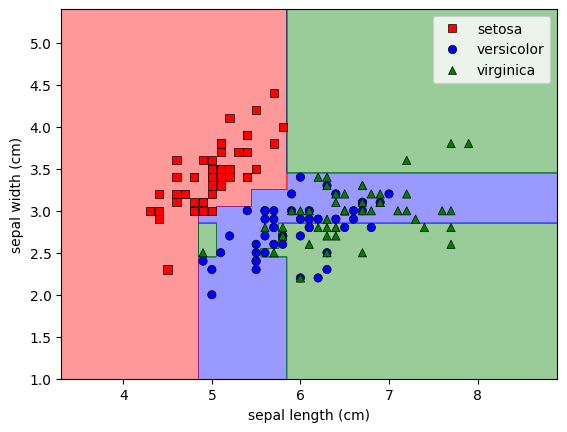

In [12]:
plot_decision_boundaries(clf, X, y, iris.feature_names, iris.target_names)

## Tuning the Hyperparameters
The main hyperparameters to tune in AdaBoost are the number of estimators, its learning rate, and the complexity of the base estimators (e.g., the maximum depth of the tree or the minimum number of samples in leaf nodes).

There is a tradeoff between the number of estimators and the learning rate parameters. Decreasing the learning rate leads to smaller changes in the weight distributions $D(i)$, which in turn reduces overfitting of the learners to noisy samples. On the other hand, it also entails more boosting rounds in order to correct the errors of the previous learners, which in turn increases the number of estimators in the ensemble and thereby makes the final model more complex and susceptible to overfitting.

For example, let's tune the hyperparameters of the previous AdaBoostClassifier by running the following randomized search:

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    'base_estimator__max_depth': np.arange(1, 11),
    'n_estimators': [10, 50, 100, 200, 500],
    'learning_rate': np.arange(0.1, 1.0, 0.1),
}

base_estimator = DecisionTreeClassifier(random_state=42)
search = RandomizedSearchCV(AdaBoostClassifier(base_estimator, random_state=42), params, 
                            n_iter=50, cv=3, n_jobs=-1)
search.fit(X_train, y_train)

print(search.best_params_)

{'n_estimators': 50, 'learning_rate': 0.1, 'base_estimator__max_depth': 2}


D:\github\data-mining\venv\Lib\site-packages\sklearn\model_selection\_search.py:930: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  self.best_estimator_ = clone(base_estimator).set_params(


In [16]:
best_clf = search.best_estimator_
print(f'Train accuracy: {best_clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {best_clf.score(X_test, y_test):.4f}')

Train accuracy: 0.7857
Test accuracy: 0.7632


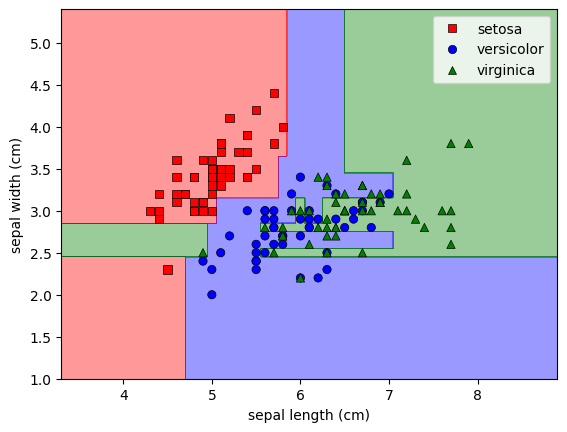

In [17]:
plot_decision_boundaries(best_clf, X, y, iris.feature_names, iris.target_names)